In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataframe=pd.read_csv('C:/Users/varshakm/Downloads/New_York_reviews.csv', index_col= 0)
#used index_col to exclude the default indexing column 'Unnamed'

C:\Users\varshakm\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
dataframe.head(10)

,parse_count,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,url_restaurant,author_id
1,2,Lido,5,Positive,review_773559838,A Regular Treat,My wife and I have been eating dinner frequent...,My wife and I have been eating dinner frequent...,"October 8, 2020",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_0
2,3,Lido,4,Positive,review_769429529,Good neighborhood spot!,Came with family for Labor Day weekend brunch ...,Came with family for Labor Day weekend brunch ...,"September 8, 2020",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_1
3,4,Lido,1,Negative,review_745700258,Disappointing,Food was mediocre at best. The lamb chops are...,Food was mediocre at best. The lamb chops are ...,"February 17, 2020",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_2
4,5,Lido,5,Positive,review_728859349,What a find in Harlem,My co-workers were volunteering at a foodbank ...,My co-workers were volunteering at a foodbank ...,"November 25, 2019",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_3
5,6,Lido,5,Positive,review_728429643,Lunch,Lido is an intimate boutique style restaurant....,Lido is an intimate boutique style restaurant....,"November 23, 2019",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_4
6,7,Lido,5,Positive,review_718894071,Had dinner with work colleagues at a conferenc...,This restaurant will be on the top of my list ...,This restaurant will be on the top of my list ...,"October 16, 2019",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_5
7,8,Lido,5,Positive,review_717818537,A neighborhood Gem,"Superb Service, great food & energy. I would e...","Superb Service, great food & energy. I would e...","October 12, 2019",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_6
8,9,Lido,4,Positive,review_715087166,Very good Italian food,Very good food and good variety all make this ...,Very good food and good variety all make this ...,"October 3, 2019",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_7
9,10,Lido,5,Positive,review_706524497,Never fails,This was my 3rd time coming. Every time I trie...,This was my 3rd time coming. Every time I trie...,"September 4, 2019",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_8
10,11,Havana_Central_Restaurant_Rum_Bar,5,Positive,review_766840809,In Love with My Havana,Just had lunch and a fantastic cup of coffee. ...,Just had lunch and a fantastic cup of coffee. ...,"August 24, 2020",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_9


In [4]:
dataframe.shape

(510463, 12)

# DATA EXPPLORATION #

### The following is the available information about the data ###

### Ideas 
1. We can check if the sentiment of the title matches the sentiment of the complete review and the sample/the number review.
2. We can compare the sentiments of all the combination of columns which display sentiment
3. We can match the urls and the restaurant names to see if they are different branches
4. See if we can predict the cuisine by restaurant name.
5. Predict the cuisine using key words in reviews. We can further see which cuisine got the best ratings


### Observations ###
1. The number of categories of uids is extremely high
2. Date is not ordered
3. City column seems to be redundant. We can drop it when doing city review analysis
4. We can drop the review preview column if we are going to use the complete review and retain it to see if there are reviews startig off negatively and ending positively and vice versa.
5. Check if we can drop the review id column and either use the parse count or unnamed columns





# DATA CLEANING #

In [5]:
dataframe.columns

Index(['parse_count', 'restaurant_name', 'rating_review', 'sample',
       'review_id', 'title_review', 'review_preview', 'review_full', 'date',
       'city', 'url_restaurant', 'author_id'],
      dtype='object')

In [6]:
dataframe.isna().sum()

parse_count        0
restaurant_name    0
rating_review      0
sample             0
review_id          0
title_review       1
review_preview     1
review_full        2
date               2
city               2
url_restaurant     2
author_id          2
dtype: int64

In [7]:
dataframe[dataframe['title_review'].isnull()]

,parse_count,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,url_restaurant,author_id
roasted poblano chile. And good value. Best meal we had on our trip.,Went on recommendation from a friend. Service ...,"February 5, 2017",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_173516,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dataframe[dataframe['url_restaurant'].isnull()]

,parse_count,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,url_restaurant,author_id
304661,304662,Rosa_Mexicano,5,Positive,review_457424042,Special birthday dinner while visiting from En...,Went on recommendation from a friend. Service ...,NaN,NaN,NaN,NaN,NaN
roasted poblano chile. And good value. Best meal we had on our trip.,Went on recommendation from a friend. Service ...,"February 5, 2017",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_173516,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
NY_reviews=dataframe.dropna()

In [10]:
NY_reviews.isna().sum()


parse_count        0
restaurant_name    0
rating_review      0
sample             0
review_id          0
title_review       0
review_preview     0
review_full        0
date               0
city               0
url_restaurant     0
author_id          0
dtype: int64

In [11]:
dataframe.shape
NY_reviews.shape

(510461, 12)

In [12]:
type(NY_reviews['parse_count'])

pandas.core.series.Series

In [13]:
NY_reviews.describe()

,parse_count,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,url_restaurant,author_id
count,510461,510461,510461,510461,510461,510461,510461,510461,510461,510461,510461,510461
unique,510461,1805,10,2,510461,371124,510314,510341,5514,1,52796,249901
top,266417,Carmine_s_Italian_Restaurant_Times_Square,5,Positive,review_676360066,Great food,A nice change from the typical Steakhouse ambi...,A nice change from the typical Steakhouse ambi...,"December 15, 2015",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_7760
freq,1,6992,227762,419762,1,1266,3,3,538,510461,10,226


In [14]:
NY_reviews.dtypes

parse_count        object
restaurant_name    object
rating_review      object
sample             object
review_id          object
title_review       object
review_preview     object
review_full        object
date               object
city               object
url_restaurant     object
author_id          object
dtype: object

In [15]:
#dataframe.hist(bins=30)
#cannot plot histogram since all the values are categorical values

In [16]:
NY_reviews['rating_review'].value_counts()

5    227762
4    138785
3     46988
5     31209
4     22006
2     17553
1     13839
3      7356
2      2759
1      2204
Name: rating_review, dtype: int64

<AxesSubplot:>

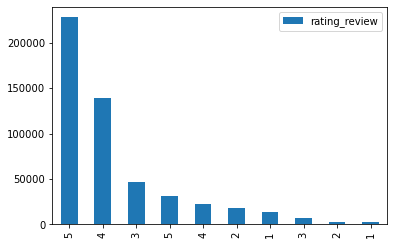

In [17]:
pd.DataFrame(NY_reviews['rating_review'].value_counts()).plot(kind='bar')

In [18]:
NY_reviews['sample'].value_counts()

Positive    419762
Negative     90699
Name: sample, dtype: int64

<AxesSubplot:>

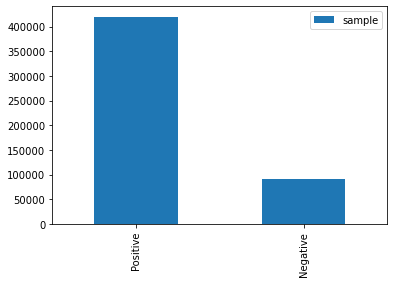

In [19]:
pd.DataFrame(NY_reviews['sample'].value_counts()).plot(kind='bar')

In [20]:
NY_reviews['review_full'].duplicated().sum()

120

In [21]:
pd.to_datetime(NY_reviews['date'])

1        2020-10-08
2        2020-09-08
3        2020-02-17
4        2019-11-25
5        2019-11-23
            ...    
517678   2019-01-04
517679   2017-09-14
517680   2018-11-01
517681   2013-07-16
517682   2018-12-10
Name: date, Length: 510461, dtype: datetime64[ns]

In [22]:
NY_reviews.dtypes

parse_count        object
restaurant_name    object
rating_review      object
sample             object
review_id          object
title_review       object
review_preview     object
review_full        object
date               object
city               object
url_restaurant     object
author_id          object
dtype: object

In [23]:
NY_reviews.duplicated(subset='review_full')
NY_reviews

,parse_count,restaurant_name,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,url_restaurant,author_id
1,2,Lido,5,Positive,review_773559838,A Regular Treat,My wife and I have been eating dinner frequent...,My wife and I have been eating dinner frequent...,"October 8, 2020",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_0
2,3,Lido,4,Positive,review_769429529,Good neighborhood spot!,Came with family for Labor Day weekend brunch ...,Came with family for Labor Day weekend brunch ...,"September 8, 2020",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_1
3,4,Lido,1,Negative,review_745700258,Disappointing,Food was mediocre at best. The lamb chops are...,Food was mediocre at best. The lamb chops are ...,"February 17, 2020",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_2
4,5,Lido,5,Positive,review_728859349,What a find in Harlem,My co-workers were volunteering at a foodbank ...,My co-workers were volunteering at a foodbank ...,"November 25, 2019",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_3
5,6,Lido,5,Positive,review_728429643,Lunch,Lido is an intimate boutique style restaurant....,Lido is an intimate boutique style restaurant....,"November 23, 2019",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_4
...,...,...,...,...,...,...,...,...,...,...,...,...
517678,517679,ROAST_Homestyle_Chicken,1,Negative,review_643595497,Worst Place Ever,This a warning to all vendors and people who g...,This a warning to all vendors and people who g...,"January 4, 2019",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_249900
517679,517680,ROAST_Homestyle_Chicken,4,Positive,review_524510889,Perfect Salad,I had lunch here with two friends in the city ...,I had lunch here with two friends in the city ...,"September 14, 2017",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_6718
517680,517681,McDonald_s,2,Negative,review_630037086,Macdonalds,"Not enough staff , and a long wait for the foo...","Not enough staff , and a long wait for the foo...","November 1, 2018",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_244457
517681,517682,Subway,1,Negative,review_167784664,This is food?,"Look at the tomatoes. Look at the wilted, shr...","Look at the tomatoes. Look at the wilted, shr...","July 16, 2013",New_York_City_New_York,https://www.tripadvisor.com/Restaurant_Review-...,UID_50398


In [24]:
NY_reviews.groupby('restaurant_name').count().sort_values(by='date')


,parse_count,rating_review,sample,review_id,title_review,review_preview,review_full,date,city,url_restaurant,author_id
restaurant_name,,,,,,,,,,,
Mokyo,1,1,1,1,1,1,1,1,1,1,1
Cappone_s_Salumeria,1,1,1,1,1,1,1,1,1,1,1
Pizza_King,1,1,1,1,1,1,1,1,1,1,1
The_Halal_Indian_Kitchen,1,1,1,1,1,1,1,1,1,1,1
Campus_Eatery,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
Ellen_s_Stardust_Diner,3362,3362,3362,3362,3362,3362,3362,3362,3362,3362,3362
The_Smith,3455,3455,3455,3455,3455,3455,3455,3455,3455,3455,3455
Buddakan,3473,3473,3473,3473,3473,3473,3473,3473,3473,3473,3473


In [25]:
NY_reviews=pd.read_csv('C:/Users/varshakm/Downloads/NY_reviews_cleaned.csv')

In [26]:
NY_reviews.head()

,restaurant_name,rating_review,sample,title_review,review_preview,review_full,date,author_id
0,Lido,5,Positive,a regular treat,my wife and i have been eating dinner frequent...,my wife and i have been eating dinner frequent...,2020-10-08,UID_0
1,Lido,4,Positive,good neighborhood spot!,came with family for labor day weekend brunch ...,came with family for labor day weekend brunch ...,2020-09-08,UID_1
2,Lido,1,Negative,disappointing,food was mediocre at best. the lamb chops are...,food was mediocre at best. the lamb chops are ...,2020-02-17,UID_2
3,Lido,5,Positive,what a find in harlem,my co-workers were volunteering at a foodbank ...,my co-workers were volunteering at a foodbank ...,2019-11-25,UID_3
4,Lido,5,Positive,lunch,lido is an intimate boutique style restaurant....,lido is an intimate boutique style restaurant....,2019-11-23,UID_4


In [27]:
#user_item_matrix = NY_reviews.groupby(['author_id', 'restaurant_name'])['rating_review'].agg(list).unstack()



In [28]:
#user_item_matrix

In [29]:
#user_item_matrix2 = NY_reviews.pivot(index='author_id', columns='restaurant_name', values='rating_review').fillna(method='ffill', axis=1)


In [30]:
#from sklearn.metrics.pairwise import cosine_similarity

#user_similarity = cosine_similarity(user_item_matrix.fillna(0))


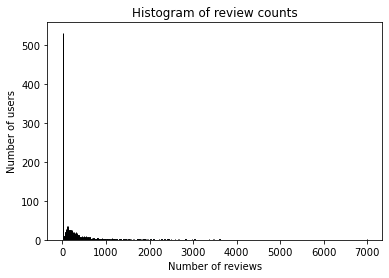

In [31]:
# count number of reviews for each restaurant
restaurant_value_counts = NY_reviews['restaurant_name'].value_counts()
# import matplotlib.pyplot as plt
# Plot the histogram
plt.hist(restaurant_value_counts, bins=1000, edgecolor='black')

# Set labels and title
plt.xlabel('Number of reviews')
plt.ylabel('Number of users')
plt.title('Histogram of review counts')

# Display the plot
plt.show()

In [ ]:
from datetime import datetime, timedelta
Restaurant_Groups=NY_reviews.groupby('restaurant_name')
# Get the last date in the dataset
last_date = NY_reviews['date'].max()

# Calculate the date one year before the last date
one_year_before_last_date = last_date - timedelta(days=365)

# Create a list to store tuples of restaurant names, review counts, and latest dates
restaurants_data = []
restaurant_counts = {}
latest_dates = {}
# Filter restaurants with a one-year gap from the latest date in their reviews
for name, group in Restaurant_Groups:
    latest_review_date = group['date'].max()
    if (last_date - latest_review_date).days >= 500:
        restaurant_counts[name] = len(group)
        latest_dates[name] = latest_review_date
        restaurants_data.append((name, len(group), latest_review_date))

# Sort the restaurants based on the latest review date
sorted_restaurants = sorted(restaurants_data, key=lambda x: x[2], reverse=True)

# Print the restaurants in order of the latest review date
for restaurant in sorted_restaurants:
    print("Restaurant:", restaurant[0])
    print("Number of Reviews:", restaurant[1])
    print("Latest Review Date:", restaurant[2])
    print()

print()

print('Total number of restaurants with the latest review older than 1 year is',len(sorted_restaurants))